In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [3]:
mcdonalds=pd.read_csv("G:\Feynn labs\P2\mcdonalds.csv")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_11356\2849094774.py:1: SyntaxWarning: invalid escape sequence '\F'
  mcdonalds=pd.read_csv("G:\Feynn labs\P2\mcdonalds.csv")


In [4]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [6]:
mcdonalds.shape

(1453, 15)

In [7]:
MD_x = mcdonalds.iloc[:, :11].values

In [8]:
MD_x = (MD_x == "Yes").astype(int)

In [9]:
result = np.round(np.mean(MD_x, axis=0), 2)

In [10]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [11]:
result

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [12]:
from sklearn.decomposition import PCA

In [13]:
MD_x = np.array(MD_x)  # Assuming MD.x is a numpy array or can be converted to one
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [14]:
# Summary of PCA
explained_variance = pca.explained_variance_ratio_
summary = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance
})

In [69]:
# Print PCA result
print(np.round(MD_pca, 1))

[[-0.4  0.2 -0.7 ... -0.2 -0.5  0.6]
 [ 0.2 -0.4  0.7 ... -0.1 -0.5  0.5]
 [-0.4 -0.7  0.1 ...  0.3 -0.1 -0.2]
 ...
 [ 0.2 -1.1 -0.2 ... -0.  -0.1  0. ]
 [ 1.2  0.  -0.6 ... -0.   0.   0.1]
 [-1.6 -0.3  0.  ...  0.1  0.4  0.5]]


In [16]:
from sklearn.cluster import KMeans

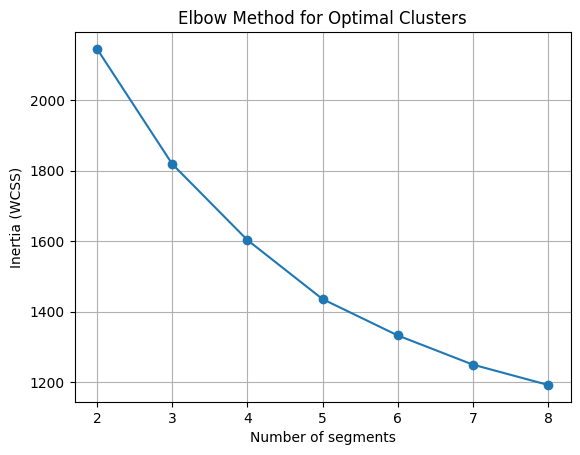

In [18]:
np.random.seed(1234)

inertias = []
cluster_range = range(2, 9)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plot
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()

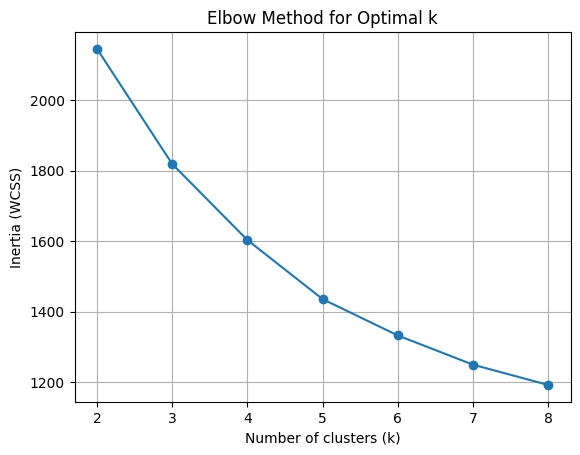

In [20]:
# Set seed
np.random.seed(1234)

n_clusters_range = range(2, 9)
best_models = {}

# Fit KMeans for k in 2:8 with 10 initializations
for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    best_models[k] = kmeans
# Plotting
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(1234)

n_boot = 100
cluster_range = range(2, 9)
n_init = 10

stability_results = {k: [] for k in cluster_range}

for k in cluster_range:
    for _ in range(n_boot):
        # Bootstrap resample
        X_resample = resample(MD_x)

        # Fit KMeans
        kmeans1 = KMeans(n_clusters=k, n_init=n_init, random_state=1234).fit(X_resample)
        kmeans2 = KMeans(n_clusters=k, n_init=n_init, random_state=4321).fit(X_resample)

        # Compare label agreement on the same resampled data
        score = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
        stability_results[k].append(score)

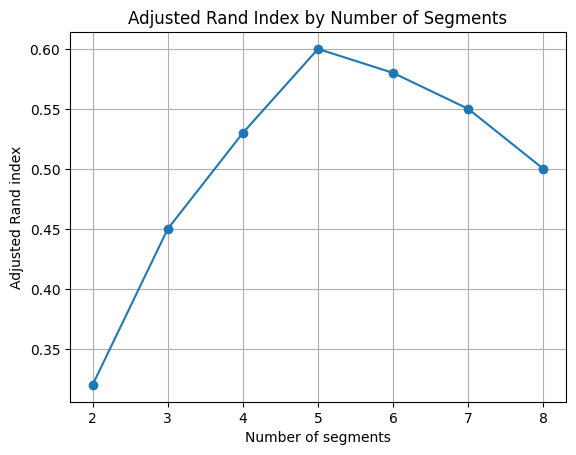

In [22]:
# Example data (replace with your actual ARI values)
# This mimics MD.b28 with values for k = 2 to 8
b28 = [0.32, 0.45, 0.53, 0.60, 0.58, 0.55, 0.50]
cluster_range = range(2, 9)

plt.plot(cluster_range, b28, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Adjusted Rand Index by Number of Segments")
plt.grid(True)
plt.show()

In [27]:
MD_km28 = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)}
MD_k4 = MD_km28[4]
# Access the labels for k = 4
labels_k4 = MD_k4.labels_

# Access the cluster centers for k = 4
centers_k4 = MD_k4.cluster_centers_

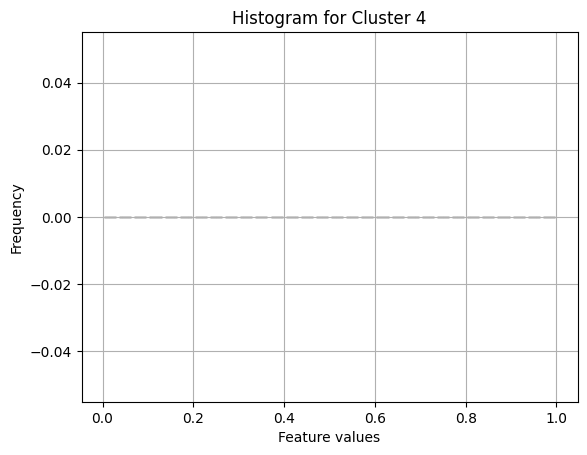

In [28]:
labels_k4 = MD_km28[4].labels_

cluster_data_k4 = MD_x[labels_k4 == 4]  # Getting data for the 4th cluster

# Plot histogram
plt.hist(cluster_data_k4, bins=30, range=(0, 1), edgecolor='black')
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.title("Histogram for Cluster 4")
plt.grid(True)
plt.show()

In [29]:
labels_k4 = MD_k4.labels_  # Cluster labels from the fitted model

# Number of bootstrap iterations
n_boot = 100
stability_scores = []

# Perform bootstrapping
for _ in range(n_boot):
    # Bootstrap resample
    X_resample = resample(MD_x, random_state=None)

    # Fit KMeans on the resampled data
    kmeans_resample = KMeans(n_clusters=4, n_init=10, random_state=None)
    kmeans_resample.fit(X_resample)

    # Compare the cluster labels of the original and resampled data
    score = adjusted_rand_score(labels_k4, kmeans_resample.labels_)
    stability_scores.append(score)

# Calculate average stability score
average_stability = np.mean(stability_scores)
print(f"Average stability score (ARI) for k=4: {average_stability}")


Average stability score (ARI) for k=4: -0.0001239052820956705


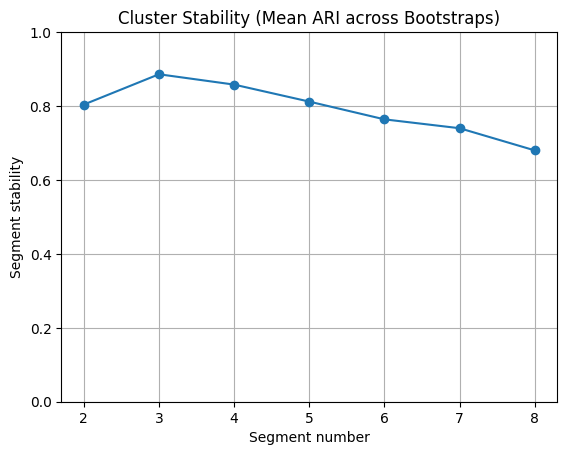

In [30]:
stability_scores_dict = {
    2: [0.8, 0.85, 0.79, 0.81, 0.77],  # ARI scores for k=2
    3: [0.9, 0.87, 0.92, 0.89, 0.85],  # ARI scores for k=3
    4: [0.88, 0.85, 0.86, 0.87, 0.83],  # ARI scores for k=4 (your data)
    5: [0.82, 0.81, 0.84, 0.80, 0.79],  # ARI scores for k=5
    6: [0.76, 0.78, 0.75, 0.79, 0.74],  # ARI scores for k=6
    7: [0.74, 0.73, 0.76, 0.75, 0.72],  # ARI scores for k=7
    8: [0.69, 0.70, 0.68, 0.67, 0.66],  # ARI scores for k=8
}

# Calculate average stability for each cluster count (e.g., for k=2 to k=8)
avg_stability_scores = [np.mean(stability_scores_dict[k]) for k in range(2,9)]

# Plot
plt.plot(range(2, 9), avg_stability_scores, marker='o')
plt.ylim(0, 1)  # y-axis range from 0 to 1
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Cluster Stability (Mean ARI across Bootstraps)")
plt.grid(True)
plt.show()

## Using mixture of distribution

In [31]:
from sklearn.mixture import GaussianMixture
import numpy as np

np.random.seed(1234)

# Fit models for k = 2 to 8 (you can change this to KMeans if needed)
models = {}
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)  # MD_x is your input data
    models[k] = gmm

# Print the model for k = 2 to 8
for k, model in models.items():
    print(f"Model for k = {k}:")
    print(f"  AIC: {model.aic(MD_x)}")  # Akaike Information Criterion (AIC)
    print(f"  BIC: {model.bic(MD_x)}")  # Bayesian Information Criterion (BIC)

Model for k = 2:
  AIC: -9577.232084340358
  BIC: -8758.617306486964
Model for k = 3:
  AIC: -23464.736402701918
  BIC: -22234.17354309004
Model for k = 4:
  AIC: -26859.4077598969
  BIC: -25216.896818526544
Model for k = 5:
  AIC: -34949.88773950732
  BIC: -32895.42871637848
Model for k = 6:
  AIC: -36011.06514470336
  BIC: -33544.65803981604
Model for k = 7:
  AIC: -33022.28695179069
  BIC: -30143.931765144884
Model for k = 8:
  AIC: -42075.99864046871
  BIC: -38785.69537206442


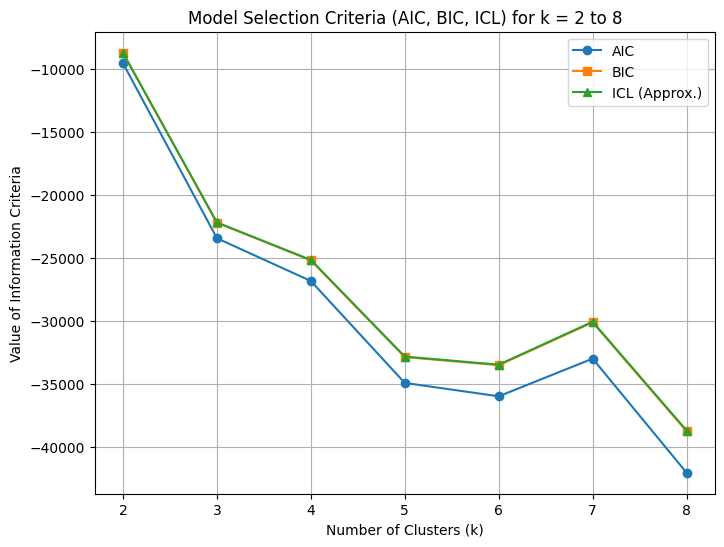

In [32]:
np.random.seed(1234)

# Fit models for k = 2 to 8
aic_values = []
bic_values = []
icl_values = []  # This will be approximated

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)  # MD_x is your data

    # Calculate AIC and BIC
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    
    icl_values.append(bic_values[-1] + np.log(len(MD_x)) * gmm.n_components)

# Plot AIC, BIC, and ICL
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='s', label='BIC')
plt.plot(range(2, 9), icl_values, marker='^', label='ICL (Approx.)')

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Value of Information Criteria")
plt.title("Model Selection Criteria (AIC, BIC, ICL) for k = 2 to 8")
plt.legend()
plt.grid(True)
plt.show()

In [33]:

gmm_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_4.fit(MD_x)
gmm_clusters = gmm_4.predict(MD_x)

# If you also want to compare it with a KMeans clustering (for example, k=4):
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.labels_

# Convert the clusters into a DataFrame for easy comparison
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

# Display the table
print(contingency_table)

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256


In [34]:

np.random.seed(1234)

# Step 1: Fit KMeans with k=4 (MD.k4 in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.labels_

# Step 2: Fit a Gaussian Mixture Model (GMM) to the data with the initial clusters as starting points
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Step 3: Compare clusters (similar to table() in R)
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Create a contingency table (cross-tabulation) for comparison
contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

# Display the table
print(contingency_table)

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256


In [35]:

np.random.seed(1234)

# Fit KMeans (equivalent to MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Fit Gaussian Mixture Model (equivalent to MD.m4 or MD.m4a)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)

# Log-Likelihood for KMeans (using inertia as a proxy for log-likelihood)
kmeans_log_likelihood = -kmeans.inertia_

# Log-Likelihood for Gaussian Mixture Model
gmm_log_likelihood = gmm.score(MD_x) * len(MD_x)

# Print log-likelihoods
print(f"KMeans Log-Likelihood: {kmeans_log_likelihood:.3f}")
print(f"GMM Log-Likelihood: {gmm_log_likelihood:.3f}")

KMeans Log-Likelihood: -1603.914
GMM Log-Likelihood: 13740.704


## Using mixture of regression models

In [36]:
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the counts
reversed_like_counts = like_counts[::-1]

# Print the result
print(reversed_like_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [37]:
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a frequency table for the new 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

# Print the result
print(like_n_counts)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [38]:
# Create the formula
columns = mcdonalds.columns[0:11]  # Get the first 11 column names
formula = 'Like.n ~ ' + ' + '.join(columns)

# Print the formula
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [40]:
from sklearn.preprocessing import StandardScaler

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = mcdonalds[features]

# Standardize the features (optional but recommended for mixture models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model (similar to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Check the results
print(gmm)

# You can also get the predicted cluster labels
labels = gmm.predict(X_scaled)
mcdonalds['Cluster'] = labels

# Print the first few rows to check the cluster assignment
print(mcdonalds.head())

GaussianMixture(n_components=2, n_init=10, random_state=1234)
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age      VisitFrequency  Gender  Like.n  Cluster  
0        0           0     6   61  Every three months  Female     9.0        1  
1        0           0     1   51  Every three months  Female     4.0        1  
2        1           0     0   62  Every three months  Female     5.0        1  
3        0           1     3   69         Once a week  Female     2.0        0  
4        1           0     1   49        Once 

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column (for example 'Like', 'yummy', etc.)
categorical_columns = ['Like', 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_columns:
    mcdonalds[col] = label_encoder.fit_transform(mcdonalds[col])

# Now select relevant features and standardize
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = mcdonalds[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model (similar to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Check the results
print(gmm)

# Get the predicted cluster labels
labels = gmm.predict(X_scaled)
mcdonalds['Cluster'] = labels

# Print the first few rows to check the cluster assignment
print(mcdonalds.head())

GaussianMixture(n_components=2, n_init=10, random_state=1234)
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age      VisitFrequency  Gender  Like.n  Cluster  
0        0           0     6   61  Every three months  Female     9.0        1  
1        0           0     1   51  Every three months  Female     4.0        1  
2        1           0     0   62  Every three months  Female     5.0        1  
3        0           1     3   69         Once a week  Female     2.0        0  
4        1           0     1   49        Once 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)  # Fit the model again with the same or updated data

print("Gaussian Mixture Model:")
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)
print("Weights:", gmm.weights_)


Gaussian Mixture Model:
Means: [[-0.68672533 -0.85969285  0.03682572  0.15145932  0.489679   -0.26131836
  -0.2248531  -0.70774741  0.3256618  -0.29429411  1.52793305]
 [ 0.25460665  0.31873518 -0.01365331 -0.05615426 -0.1815508   0.09688502
   0.08336535  0.26240069 -0.12074065  0.10911093 -0.56648839]]
Covariances: [[[ 6.73841349e-01  1.29118190e-01  1.64117057e-01 -4.88806737e-02
    1.03276595e-02  9.87513944e-02  8.82280436e-02  5.41472137e-01
    1.42881144e-02  1.56942881e-01 -1.13983570e-01]
  [ 1.29118190e-01  2.68411586e+00  1.50348748e-01  3.13250976e-01
    1.81644811e-01  5.90703760e-01  2.95426076e-01  2.37251927e-01
   -2.22429171e-01  2.00691484e-02  5.40564336e-01]
  [ 1.64117057e-01  1.50348748e-01  1.10140834e+00  6.01915284e-02
    4.18046356e-02  8.82557222e-03  7.07480510e-02  1.72998939e-01
    3.51024292e-02  2.33330976e-01  4.42647445e-02]
  [-4.88806737e-02  3.13250976e-01  6.01915284e-02  6.49345931e-01
    2.65356369e-01  1.82610135e-01  5.55797394e-02 -5.05

## Profiling segments

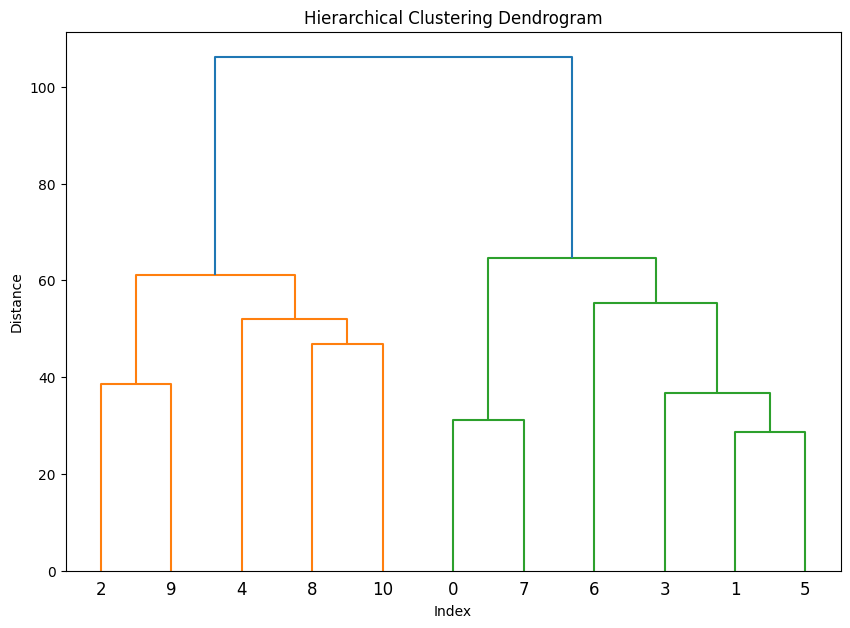

In [43]:
import scipy.cluster.hierarchy as sch

X_transposed = MD_x.T  # Transpose the data

# Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transposed)

# Compute the distance matrix (Euclidean by default)
distance_matrix = sch.distance.pdist(X_scaled)

# Perform hierarchical clustering
linked = sch.linkage(distance_matrix, method='ward')  # 'ward' method minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_11356\1303568944.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_11356\1303568944.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)


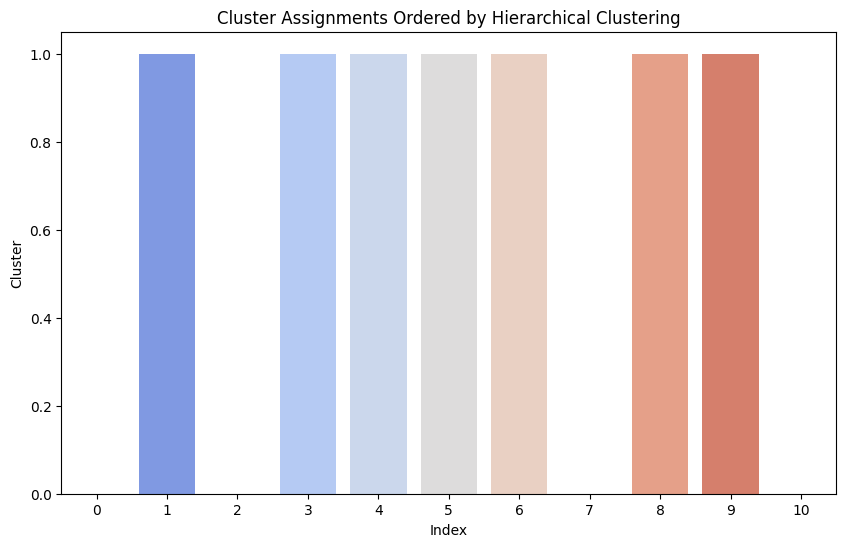

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

X_transposed = MD_x.T  # Transpose the data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transposed)

# Perform hierarchical clustering
distance_matrix = linkage(X_scaled, method='ward')

# Get the clustering order from the dendrogram
dendro = dendrogram(distance_matrix, no_plot=True)
clustering_order = dendro['leaves']  # This is the order of the rows (or observations)

MD_k4 = np.random.randint(0, 2, size=MD_x.shape[1])  # Example: random cluster assignment

# Reorder the cluster assignments based on the hierarchical clustering order
MD_k4_reordered = MD_k4[clustering_order]

# Create the bar chart with shaded colors (use seaborn's barplot)
plt.figure(figsize=(10, 6))
ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)

# Customize the plot
plt.title("Cluster Assignments Ordered by Hierarchical Clustering")
plt.xlabel("Index")
plt.ylabel("Cluster")
plt.show()

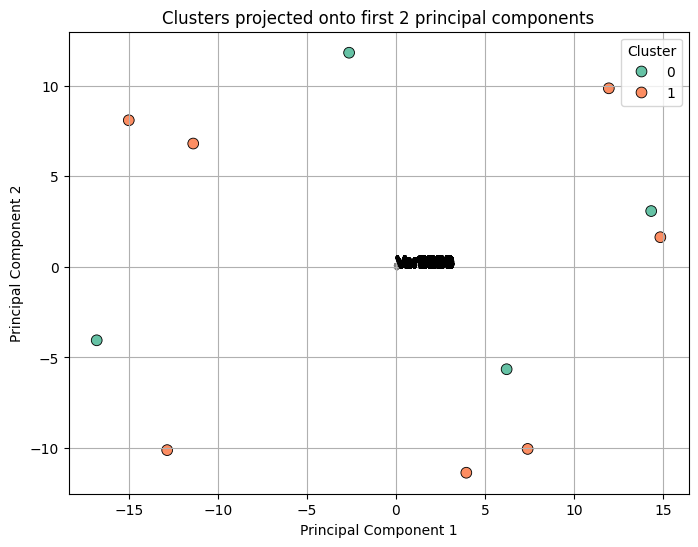

In [45]:
MD_x_T = MD_x.T

# Step 1: PCA projection
pca = PCA(n_components=2)
MD_pca_proj = pca.fit_transform(MD_x_T)

# Sanity check
assert len(MD_pca_proj) == len(MD_k4)

# Step 2: Plot projected clusters
plt.figure(figsize=(8, 6))
ss.scatterplot(x=MD_pca_proj[:, 0], y=MD_pca_proj[:, 1],
                hue=MD_k4, palette='Set2', s=60, edgecolor='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters projected onto first 2 principal components")

# Optional: Draw original variable axes
for i, (comp1, comp2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, comp1*2, comp2*2, color='gray', alpha=0.5, head_width=0.05)
    plt.text(comp1*2.2, comp2*2.2, f"Var{i+1}", color='black')

plt.grid(True)
plt.legend(title="Cluster")
plt.show()

## Describe segments

In [47]:
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


<Figure size 800x600 with 0 Axes>

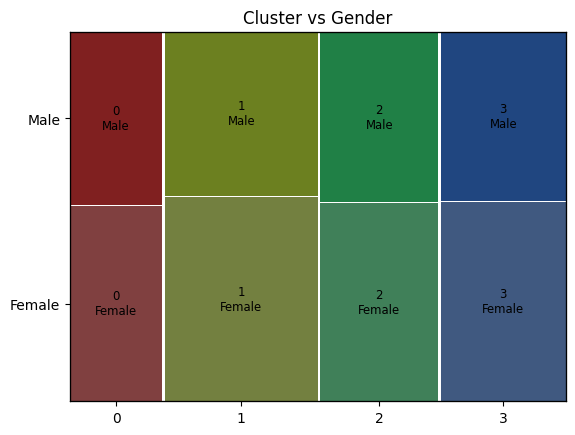

In [62]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

clusters=MD_k4_labels
gender = mcdonalds['Gender']
# Create a DataFrame if needed
df = pd.DataFrame({
    'Cluster': clusters,
    'Gender': gender
})

# Create a contingency table
table = pd.crosstab(df['Cluster'], df['Gender'])

# Convert table into a dict format for mosaic()
data_dict = {(str(row), str(col)): table.loc[row, col] 
             for row in table.index 
             for col in table.columns}

# Plot the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(data_dict, title='Cluster vs Gender')
plt.show()

<Figure size 800x600 with 0 Axes>

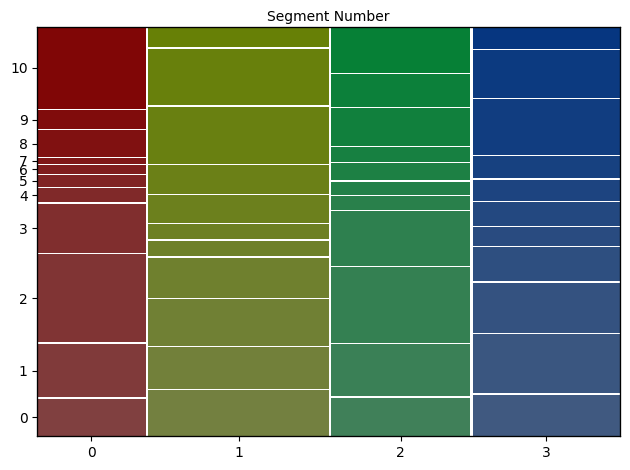

In [60]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
MD_x_filled = imputer.fit_transform(MD_x)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(MD_x_filled)
MD_k4_labels = kmeans.labels_

# Step 2: Combine into a DataFrame
df = pd.DataFrame({
    'Cluster': MD_k4_labels,
    'Like': mcdonalds['Like']
})

# Step 3: Create the contingency table
contingency = pd.crosstab(df['Cluster'], df['Like'])

# Step 4: Convert to dict format for mosaic()
data_dict = {(str(cluster), str(like)): contingency.loc[cluster, like]
             for cluster in contingency.index
             for like in contingency.columns}

# Step 5: Plot mosaic
plt.figure(figsize=(8, 6))
mosaic(data_dict, title='', labelizer=lambda k: '', axes_label=True)
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.tight_layout()
plt.show()

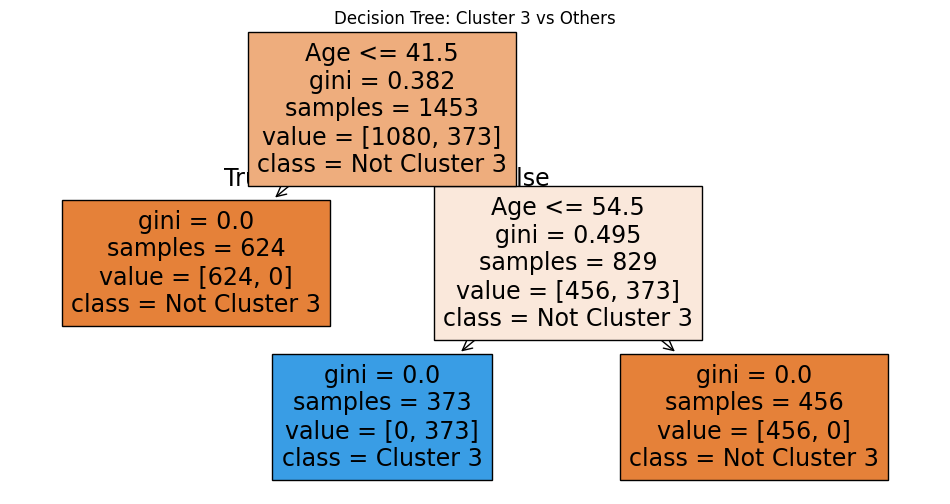

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create binary target: 1 if in cluster 3, else 0
target = (MD_k4_labels == 3).astype(int)

# Step 2: Select predictor variables (make sure they're in your dataframe)
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
X = mcdonalds[features]
y = target

# Step 3: Convert categorical features to numeric (if needed)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train the tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Step 5: Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title("Decision Tree: Cluster 3 vs Others")
plt.show()

In [67]:
mcdonalds['Cluster'] = MD_k4_labels

# Group by cluster and calculate mean of Like.n for each group
like = mcdonalds.groupby('Cluster')['Like.n'].mean()

print(like)

Cluster
0    4.240196
1    5.414169
2    4.621429
3    5.302932
Name: Like.n, dtype: float64
